In [1]:
#import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from pathlib import Path
from pathlib import Path
import os
import os.path



In [2]:
#setting file path, print spect single file
#e.g.# data_folder = Path("source_data/text_files/")
data_folder = Path("C:/Users/haarsmter/Desktop/testaudio")

In [3]:
def printspec (file):
    sample_rate, samples = wavfile.read(os.path.join(data_folder, file)) #reads audiofile
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) #gets times frequecies and spectrogram
    
    plt.figure(figsize=(15,5))    
    plt.pcolormesh(times, frequencies, np.log(spectrogram))
    plt.ylim(top=15000) 
    plt.ylabel('Freq [Hz]', size=8)
    plt.xlabel('Time [sec]', size=8)
    plt.xticks(size=6)
    plt.show()

funtion for popupwindow to interrupt script:

In [4]:
import tkinter as tk
from tkinter import ttk

def popupmsg(msg):
    popup = tk.Tk()
    popup.wm_title("!")
    label = ttk.Label(popup, text=msg)
    label.pack(side="top", fill="x", pady=10)
    B1 = ttk.Button(popup, text="Okay", command = popup.destroy)
    B1.pack()
    popup.mainloop()

C:\Users\haarsmter\AppData\Local\Temp\ipykernel_38816\1418616733.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(os.path.join(data_folder, file)) #reads audiofile


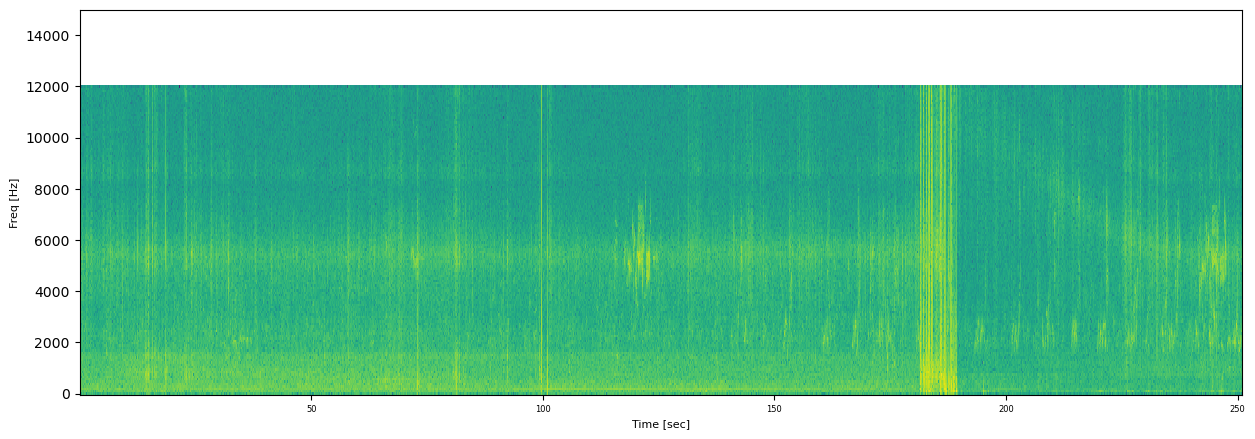

SMM10537_20230515_120749.wav
count 1 filenr 0


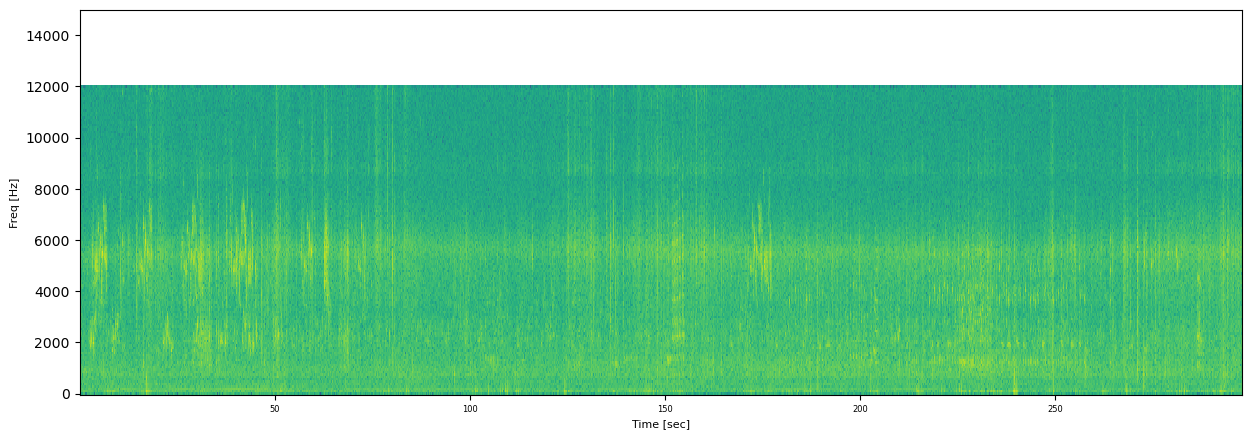

SMM10537_20230515_121202.wav
count 2 filenr 1


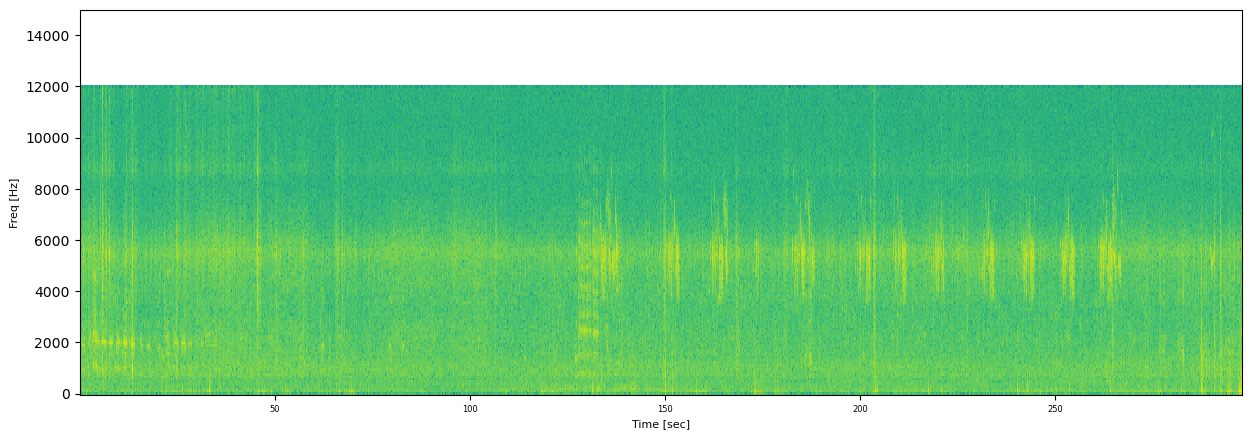

SMM10537_20230515_121702.wav
count 3 filenr 2


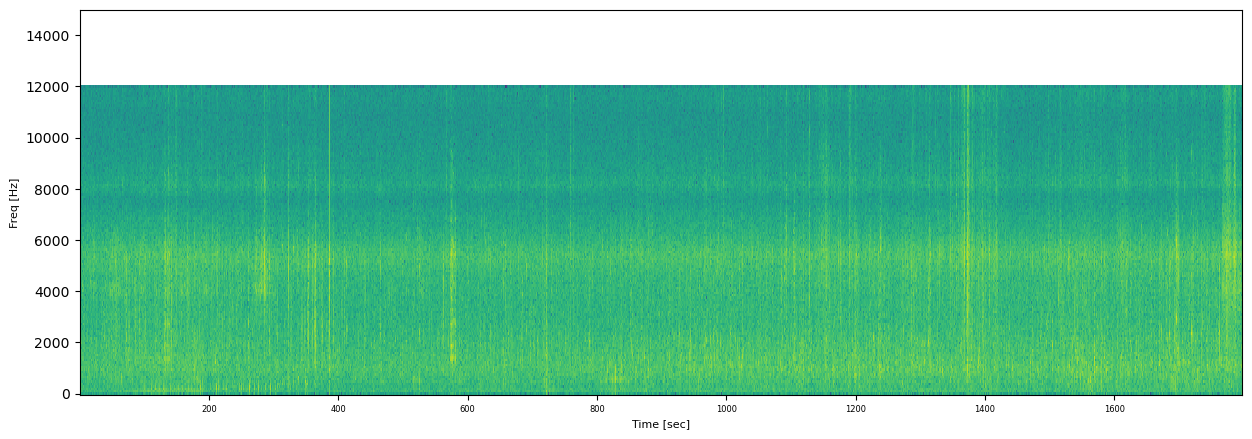

TEST29042024.wav
count 4 filenr 3


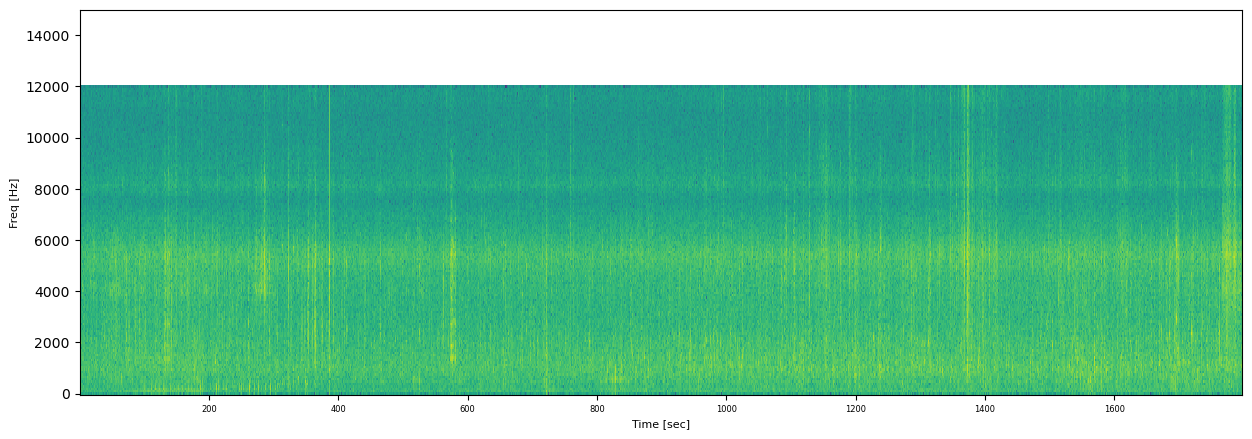

TEST29042024.wavnew.wavnew.wav
count 5 filenr 4


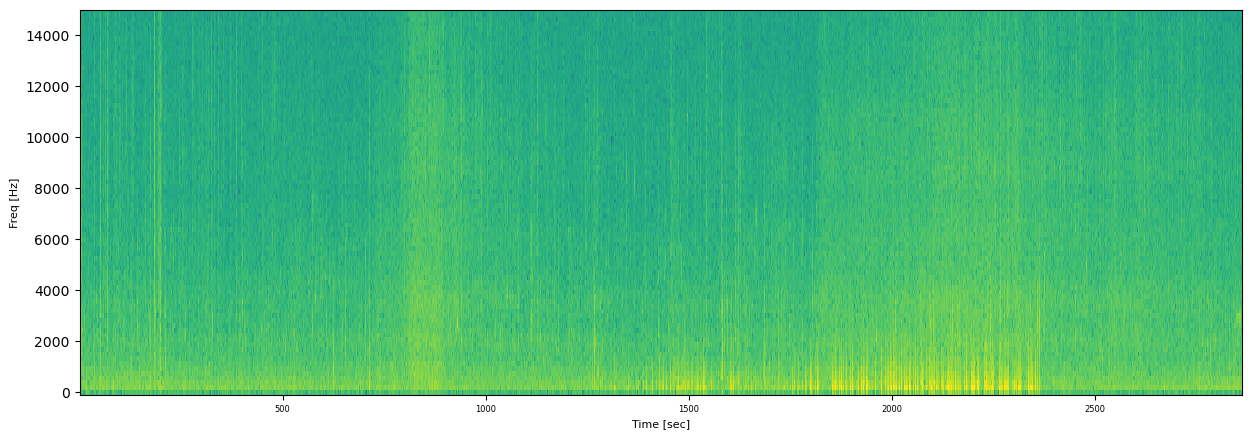

nieuw240528_1239_10secnew.wav
count 6 filenr 6


In [5]:
#get nr of files in dir
file_count = sum((len(f) for _, _, f in os.walk(data_folder)))
count=0

#print nrPerBatch spectrograms at a time. click on pop-up to continue 
##!!!! pop-up might appear behind this screen!!
nrPerBatch=100
steps=nrPerBatch
start=0
lst=os.listdir(data_folder)
lst.sort()
for filename in lst:
        if count < nrPerBatch and count >= start :
            if filename.endswith((".wav")):
                count=count+1
                printspec(filename)
                print(filename)
                print('count', count, 'filenr', lst.index(filename))            
        else: 
            popupmsg('continue?')
            start=nrPerBatch
            nrPerBatch = nrPerBatch+steps
            from IPython.display import clear_output
            clear_output()
            print('batch number', nrPerBatch/steps)
            if count==len(lst):
                break
            
        
        